In [90]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
import numpy as np
from pandas.tseries.offsets import DateOffset

In [91]:
df = pd.read_csv("dati_preprocessati.csv")
df.head()

,Index,Affluenza,Anomalous
0,1,1.000000,1
1,1,0.000000,1
2,1,0.299891,1
3,1,0.195044,1
4,1,0.198812,1


<Figure size 432x288 with 0 Axes>

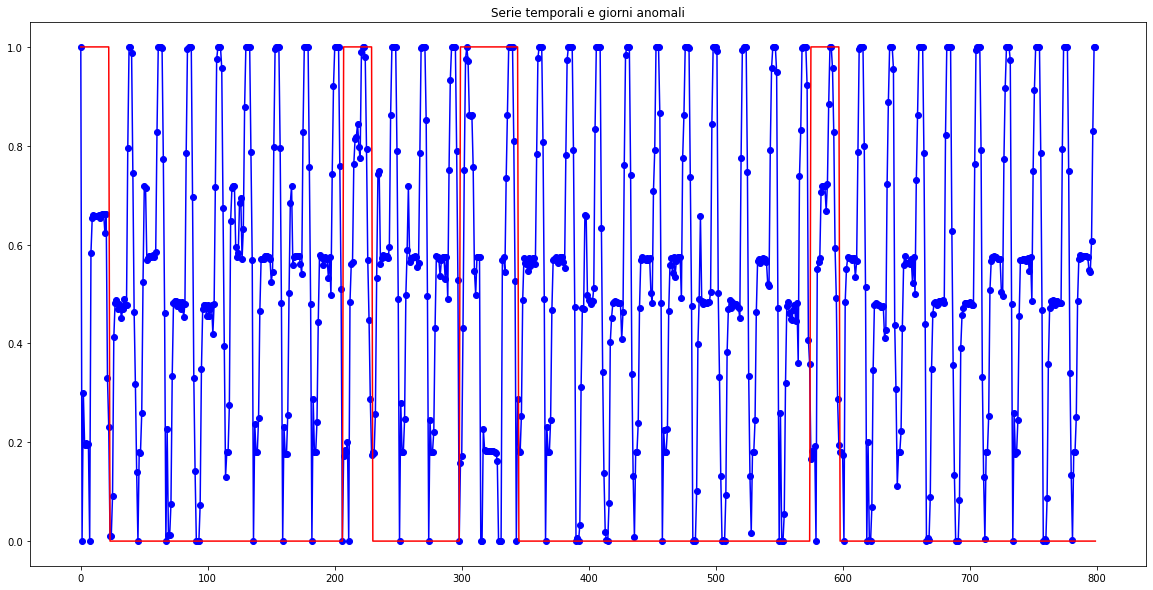

In [92]:
plt.suptitle('Giorni anomali')

plotting = df.iloc[0:800]

plt.figure(figsize=(20,10))
plt.title("Serie temporali e giorni anomali")
plt.plot(plotting.index,plotting["Affluenza"],color="b",marker="o")
plt.plot(plotting.index,plotting["Anomalous"],color="r")

plt.show()

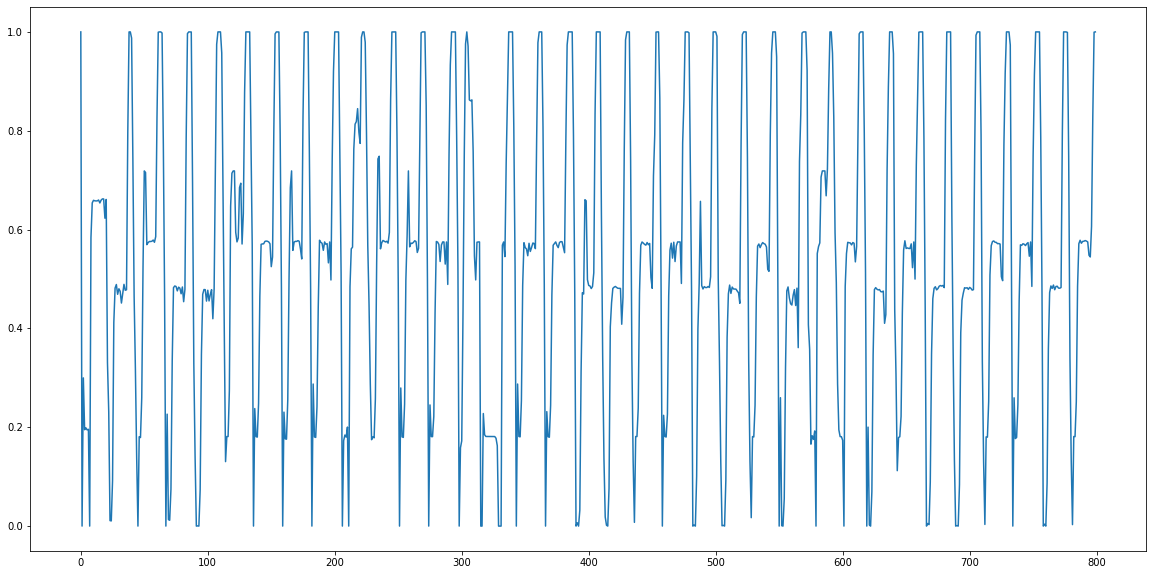

In [93]:
dataset = pd.read_csv('dati_preprocessati.csv', usecols=[1], engine='python')

plt.figure(figsize=(20,10))
plt.plot(dataset.iloc[0:800])
plt.plot()
plt.show()

In [94]:
train = dataset

scaler = MinMaxScaler()
scaler.fit(train)
train = scaler.transform(train)

In [95]:
n_input = 12
n_features = 1

generator = TimeseriesGenerator(train, train, length=n_input, batch_size=32)
model = Sequential()
model.add(LSTM(200, activation='relu', input_shape=(n_input, n_features)))
model.add(Dropout(0.15))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(generator, epochs=100)

Epoch 1/100
150/150 [==============================] - 3s 22ms/step - loss: 0.0805
Epoch 2/100
150/150 [==============================] - 3s 22ms/step - loss: 0.0236
Epoch 3/100
150/150 [==============================] - 3s 23ms/step - loss: 0.0160
Epoch 4/100
150/150 [==============================] - 3s 23ms/step - loss: 0.0142
Epoch 5/100
150/150 [==============================] - 3s 23ms/step - loss: 0.0127
Epoch 6/100
150/150 [==============================] - 3s 23ms/step - loss: 0.0128
Epoch 7/100
150/150 [==============================] - 3s 22ms/step - loss: 0.0122
Epoch 8/100
150/150 [==============================] - 4s 23ms/step - loss: 0.0114
Epoch 9/100
150/150 [==============================] - 4s 23ms/step - loss: 0.0111
Epoch 10/100
150/150 [==============================] - 3s 23ms/step - loss: 0.0107
Epoch 11/100
150/150 [==============================] - 3s 23ms/step - loss: 0.0104
Epoch 12/100
150/150 [==============================] - 3s 22ms/step - loss: 0.0104
E

In [96]:
pred_list = []

batch = train[-n_input:].reshape((1, n_input, n_features))
for i in range(n_input):
    pred_list.append(model.predict(batch)[0])
    batch = np.append(batch[:, 1:, :], [[pred_list[i]]], axis=1)

In [107]:
add_dates = [df.index[-1] + x for x in range(0, 13)]
future_dates = pd.DataFrame(index=add_dates[1:], columns=df.columns)

df_predict = pd.DataFrame(scaler.inverse_transform(pred_list), index=future_dates[-n_input:].index, columns=['Prediction'])

df_proj = pd.concat([df, df_predict], axis=1)
df_proj = df_proj.iloc[3500:]

No handles with labels found to put in legend.


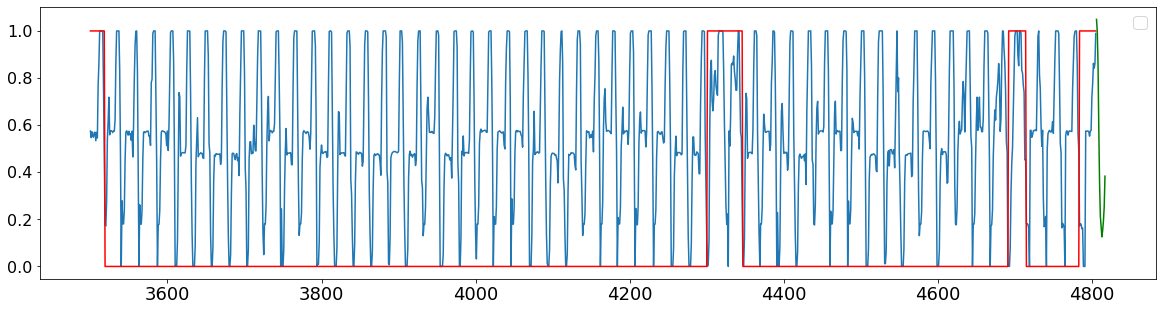

In [109]:
plotting = df.iloc[3500:]

plt.figure(figsize=(20, 5))
plt.plot(df_proj.index, df_proj['Affluenza'])
plt.plot(df_proj.index, df_proj['Prediction'], color='g')
plt.plot(plotting.index,plotting["Anomalous"], color="r")
plt.legend(loc='best', fontsize='xx-large')
plt.xticks(fontsize=18)
plt.yticks(fontsize=16)
plt.show()